In [1]:
import pandas as pd


In [8]:
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey.csv


In [9]:
df = pd.read_csv("survey.csv")

In [10]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [11]:
df.shape

(1259, 27)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [13]:
df['treatment'].value_counts()

,count
treatment,
Yes,637
No,622


In [14]:
df.drop(['Timestamp','comments'], axis=1,inplace=True)

In [15]:
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [16]:
df.isnull().sum()  # See where nulls are

,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0
remote_work,0


Target varible here will be treatment.

In [17]:
df.shape

(1259, 25)

In [18]:
df.drop('state', axis=1, inplace=True)

In [19]:
df['work_interfere'].fillna(df['work_interfere'].mode()[0],inplace=True)

<ipython-input-19-a3c0fac63ec7>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['work_interfere'].fillna(df['work_interfere'].mode()[0],inplace=True)


In [20]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
self_employed,18
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0


In [21]:
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace =True)

<ipython-input-21-caad090c4859>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_employed'].fillna(df['self_employed'].mode()[0],inplace =True)


In [22]:
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0


In [23]:
df.shape  # Rows and columns
df.info()  # Data types + nulls (double-check)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [24]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [25]:
df[df['Age'] > 100]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
364,329,Male,United States,No,No,Yes,Often,6-25,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Yes,Yes,Yes,Often,1-5,No,Yes,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes


In [26]:
df

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,Yes,...,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No
1255,32,Male,United States,No,Yes,Yes,Often,26-100,Yes,Yes,...,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No
1256,34,male,United States,No,Yes,Yes,Sometimes,More than 1000,No,Yes,...,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No
1257,46,f,United States,No,No,No,Sometimes,100-500,Yes,Yes,...,Don't know,Don't know,Yes,No,No,No,No,No,No,No


In [27]:
df = df[~df['Age'].isin([329, 99999999999])]

In [28]:
df['Age'].max()

72

In [29]:
df[df['Age'] < 00]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,No,No,No,Sometimes,More than 1000,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
715,-1726,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [30]:
df.drop(index=[143, 715, 1127], inplace=True)

<ipython-input-30-53a1468b2ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[143, 715, 1127], inplace=True)


In [31]:
df['Age'].min()

5

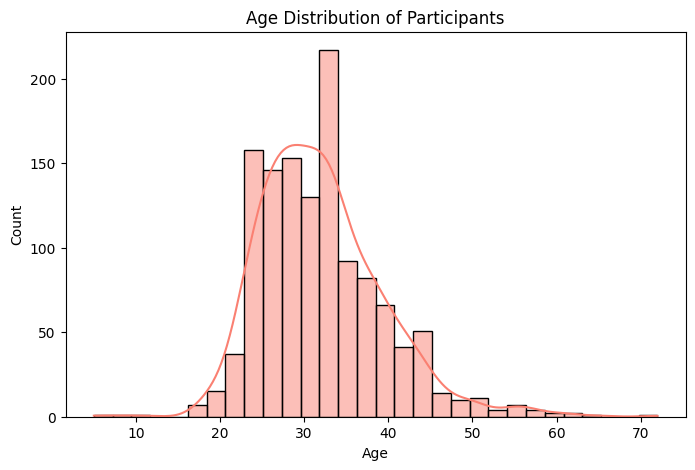

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='salmon')
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


This will show you the age range of people in the survey — is it mostly 20s/30s? Are there any older respondents?

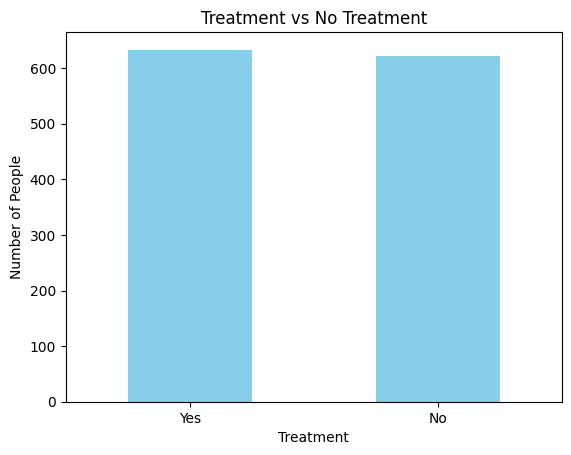

In [33]:
df['treatment'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Treatment vs No Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of People")
plt.xticks(rotation=0)
plt.show()

The dataset is balanced.

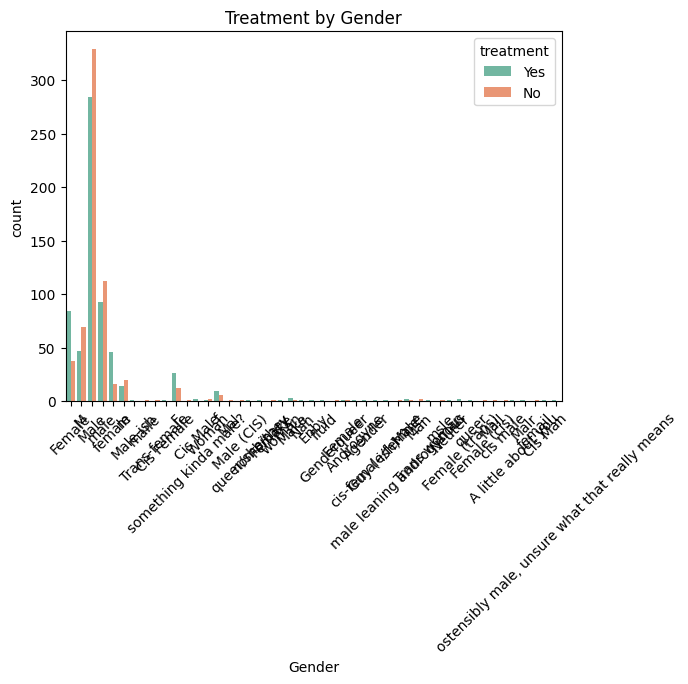

In [34]:
sns.countplot(data = df,x='Gender',hue = 'treatment',palette = 'Set2')
plt.title("Treatment by Gender")
plt.xticks(rotation=45)
plt.show()

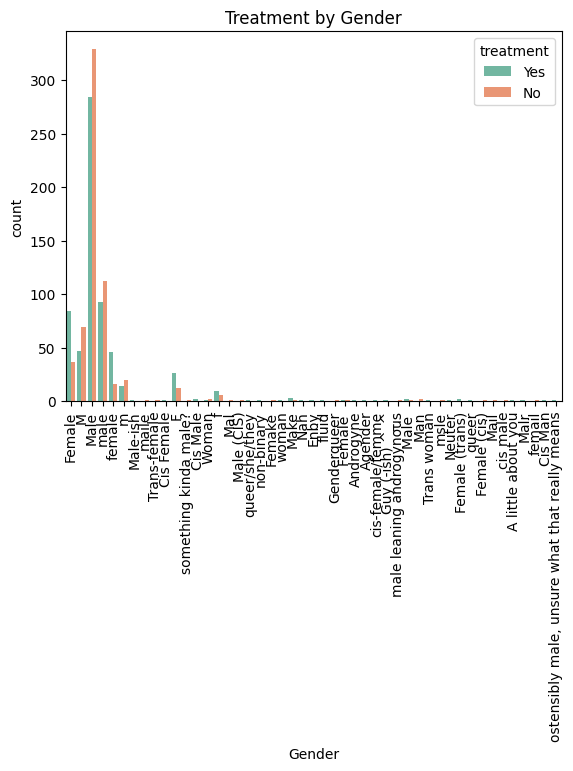

In [35]:
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2')
plt.title("Treatment by Gender")
plt.xticks(rotation=90)
plt.show()


In [36]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [37]:
def clean_gender(gender):
    gender = str(gender).lower()

    if gender in ['male', 'm', 'male-ish', 'maile', 'cis male', 'mal', 'male (cis)',
                  'make', 'man', 'msle', 'mail', 'cis man', 'malr', 'guy (-ish) ^_^',
                  'male ', 'ostensibly male, unsure what that really means',
                  'something kinda male?', 'male leaning androgynous']:
        return 'Male'

    elif gender in ['female', 'f', 'cis female', 'woman', 'femake', 'female ',
                    'cis-female/femme', 'femail', 'trans-female', 'female (trans)',
                    'female (cis)', 'woman']:
        return 'Female'

    else:
        return 'Other'

# Apply the function
df['Gender'] = df['Gender'].apply(clean_gender)

# Check the results
df['Gender'].value_counts()


<ipython-input-37-2c855b8512b4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].apply(clean_gender)


,count
Gender,
Male,992
Female,250
Other,12


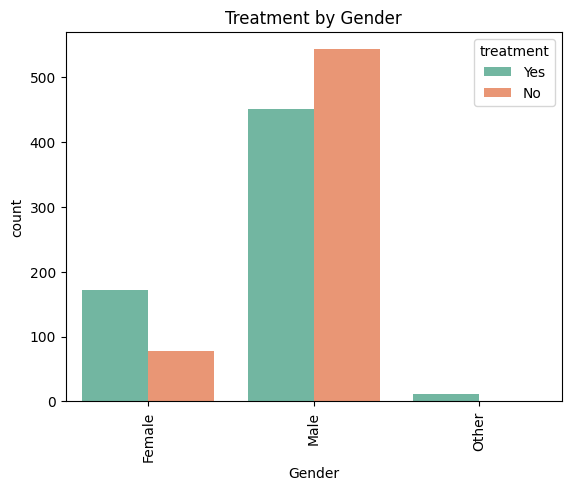

In [38]:
sns.countplot(data=df, x='Gender', hue='treatment', palette='Set2')
plt.title("Treatment by Gender")
plt.xticks(rotation=90)
plt.show()

🔍 Key Findings and Insights:
Female respondents are likely to have a higher treatment-seeking rate compared to Male respondents.

Male respondents may have a lower treatment rate or be more reluctant to seek treatment.

The number of Non-binary or other gender respondents might be relatively small, but their treatment behavior can show whether gender minorities face more challenges with mental health care.

📌 Possible Interpretations:
Females in the dataset may be more willing to seek help for mental health issues than their male counterparts.

Males may face more stigma, societal expectations, or underreporting when it comes to seeking treatment.

Gender-related cultural factors may affect awareness and acceptance of mental health treatment.

Gender minorities (Non-binary, etc.) might experience specific challenges in accessing appropriate treatment or support, which could reflect differently in the dataset.

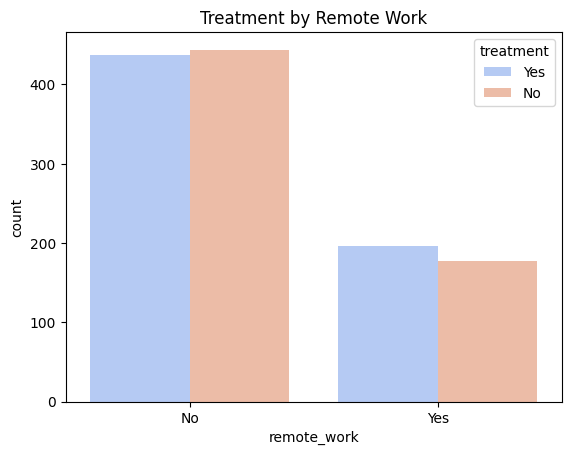

In [40]:
sns.countplot(data=df, x='remote_work', hue='treatment', palette='coolwarm')
plt.title("Treatment by Remote Work")
plt.show()


The people who do not do remote work are more likely to take treatments

Interpretation:
This may be due to more awareness and availability of healthcare professionals in big cities.

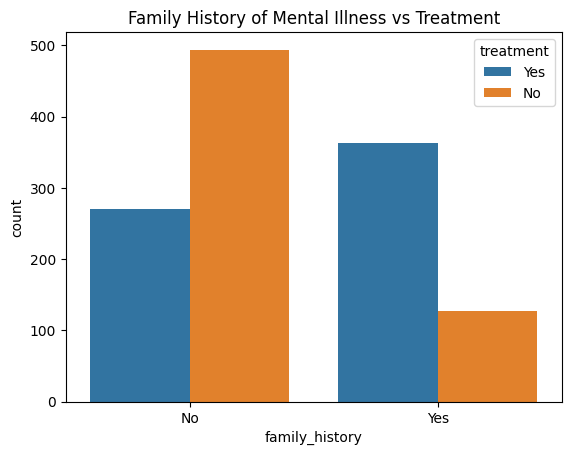

In [41]:
sns.countplot(x='family_history', hue='treatment', data=df)
plt.title("Family History of Mental Illness vs Treatment")
plt.show()


Finding:

Respondents with a family history of mental illness are more likely to seek treatment.

The “Yes” bar for treatment is noticeably higher for those with family history.

🔍 Interpretation:

There may be more awareness, early recognition of symptoms, or reduced stigma when someone has seen it in their family.

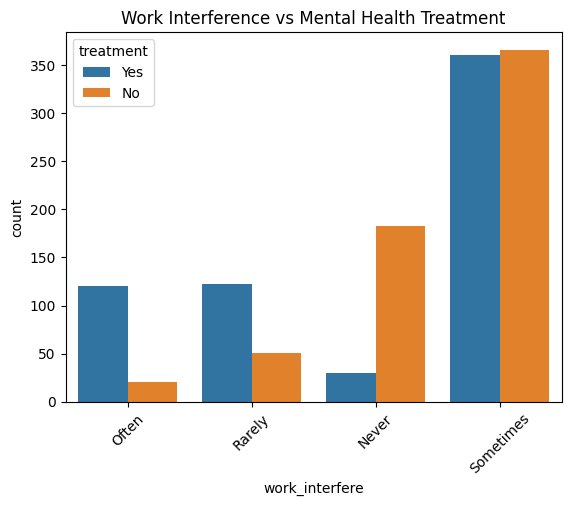

In [42]:
sns.countplot(x='work_interfere', hue='treatment', data=df)
plt.title("Work Interference vs Mental Health Treatment")
plt.xticks(rotation=45)
plt.show()


Finding:

People who report that mental health "often" or "sometimes" interferes with work are more likely to seek treatment.

Those who said it “never” interferes are the least likely to seek help.

🔍 Interpretation:

The more mental health impacts daily productivity, the higher the likelihood of treatment-seeking behavior.

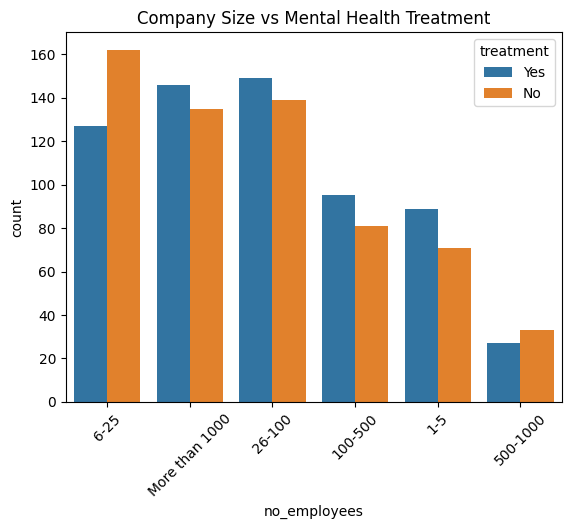

In [43]:
sns.countplot(x='no_employees', hue='treatment', data=df)
plt.title("Company Size vs Mental Health Treatment")
plt.xticks(rotation=45)
plt.show()


Finding:

The pattern may vary, but smaller companies (6-25 or 26-100 employees) often have higher treatment-seeking rates.

In large companies (1000+), treatment rates may be lower or balanced.

🔍 Interpretation:

In smaller companies, the environment may be more open, or stress more visible. Larger companies may lack personalized support, or people might fear stigma.

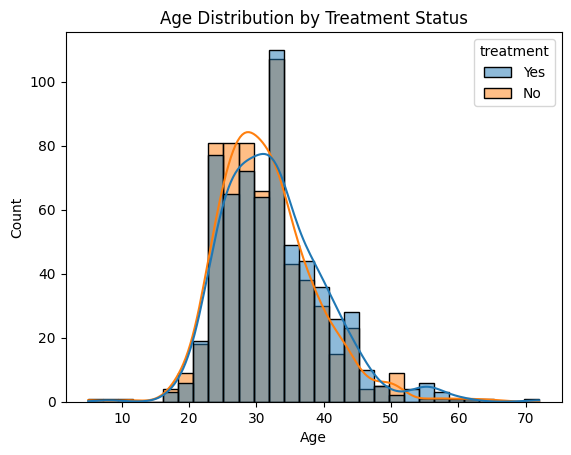

In [44]:
sns.histplot(data=df, x='Age', hue='treatment', bins=30, kde=True)
plt.title("Age Distribution by Treatment Status")
plt.show()


Even though the majority of respondents are younger (20–30), the treatment rate is higher among individuals in their 30s to 50s. This could suggest that:

Older individuals may be more aware of the importance of mental health.

They may have more resources (financial or insurance) to access treatment.

Younger individuals might still face stigma, self-doubt, or might not recognize early symptoms.

This highlights the importance of improving mental health awareness and access to support resources among younger tech professionals.

In [65]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)


Index([], dtype='object')


In [60]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to binary categorical columns
for col in categorical_cols:
    # Only apply label encoding for binary categories
    if df[col].nunique() == 2:
        df[col] = label_encoder.fit_transform(df[col])


In [61]:
# One-hot encode multi-class categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [66]:
# Check the first few rows to verify encoding
df.head()


,Age,Gender,treatment,work_interfere_Often,work_interfere_Rarely,work_interfere_Sometimes,Country_Austria,"Country_Bahamas, The",Country_Belgium,Country_Bosnia and Herzegovina,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_1
0,0.675640,0,1,True,False,False,False,False,False,False,...,False,False,True,True,False,False,False,False,True,False
1,1.625171,1,0,False,True,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
2,-0.002596,1,0,False,True,False,False,False,False,False,...,True,False,True,False,True,False,True,True,False,False
3,-0.138243,1,1,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,-0.138243,1,0,False,False,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False


In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age']] = scaler.fit_transform(df[['Age']])


In [68]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('treatment', axis=1)  # Drop 'treatment' since it's the target variable
y = df['treatment']  # 'treatment' is the target

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [71]:
# Predict the target variable on the test set
y_pred = rf_model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 73.31%


In [73]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[92 25]
 [42 92]]


In [74]:
from sklearn.metrics import classification_report

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73       117
           1       0.79      0.69      0.73       134

    accuracy                           0.73       251
   macro avg       0.74      0.74      0.73       251
weighted avg       0.74      0.73      0.73       251



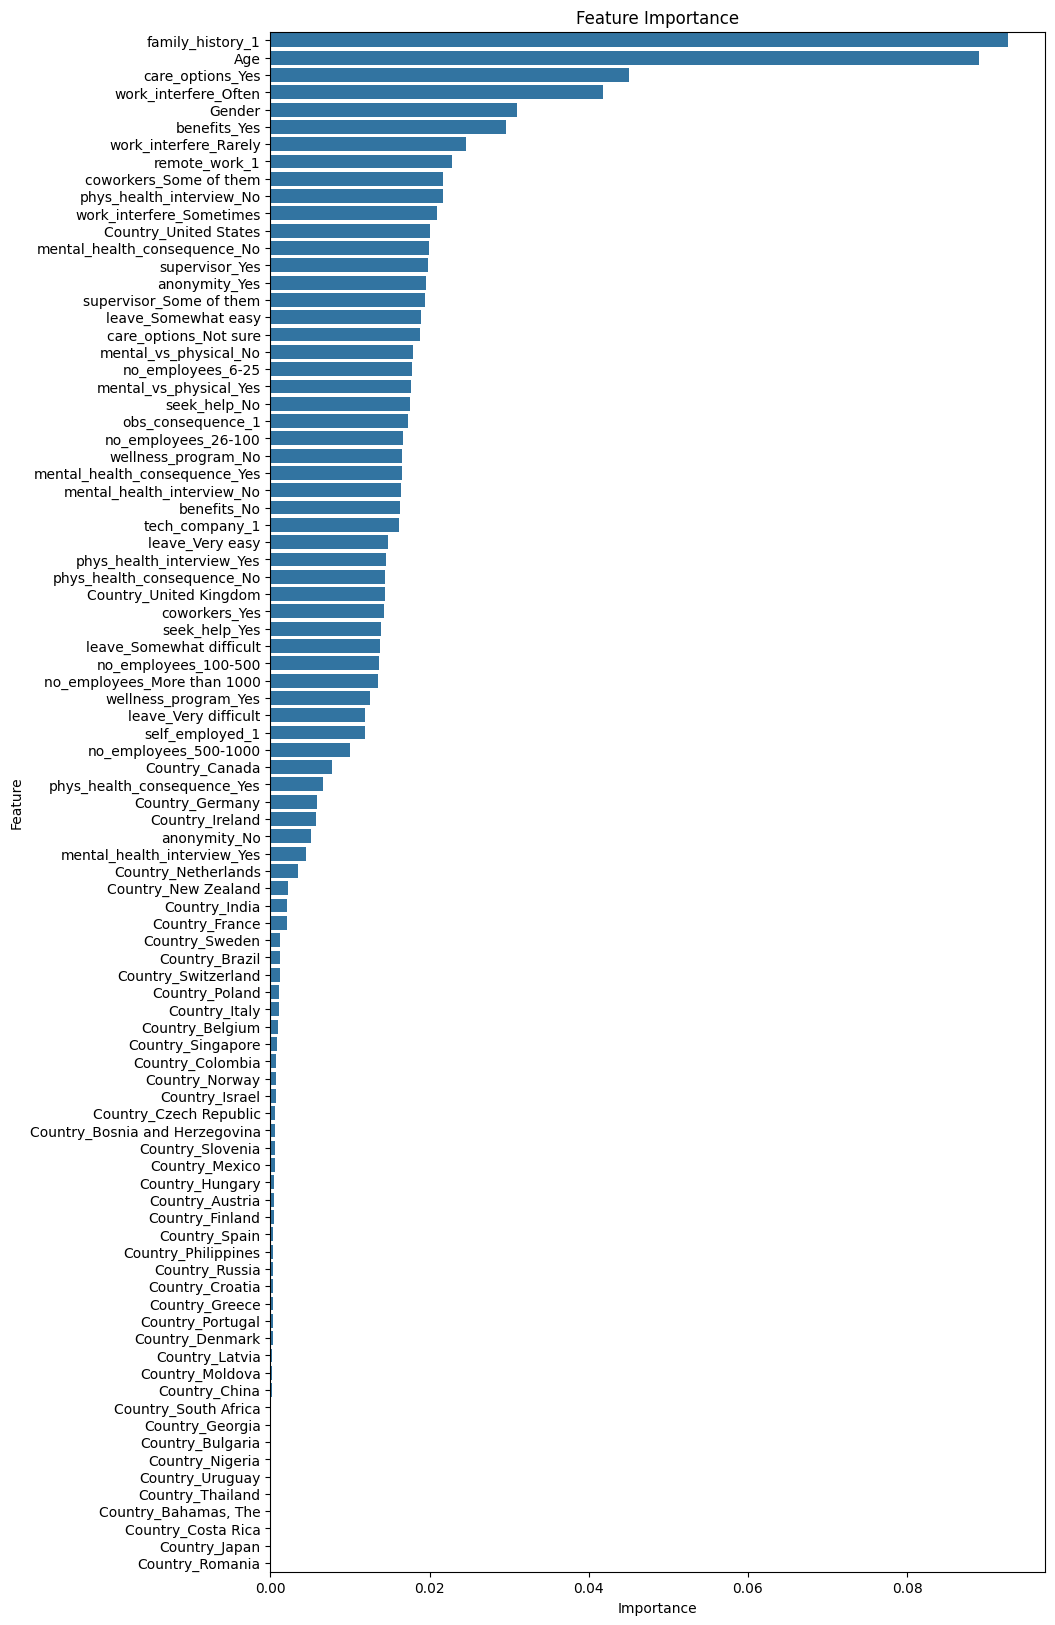

In [76]:
# Get feature importance from the trained Random Forest model
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 20))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


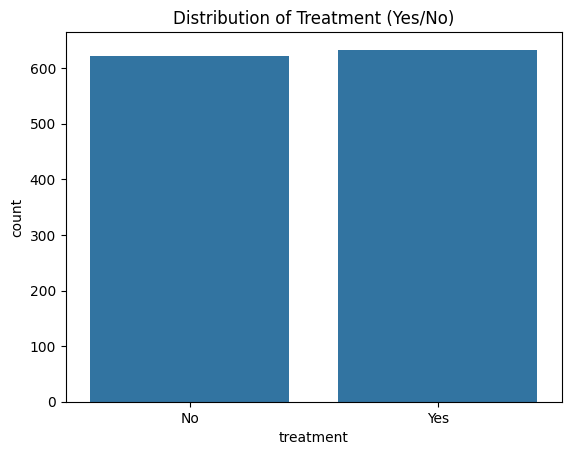

In [77]:
# Plot distribution of 'Treatment' variable
sns.countplot(x='treatment', data=df)
plt.title("Distribution of Treatment (Yes/No)")
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


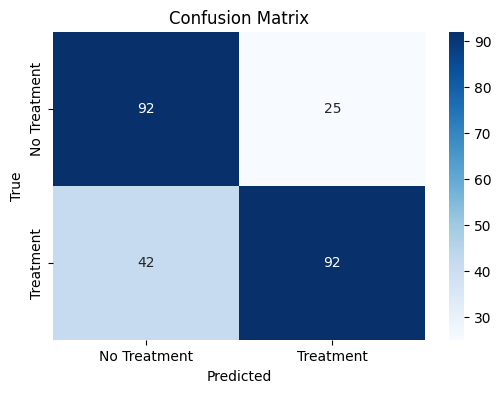

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


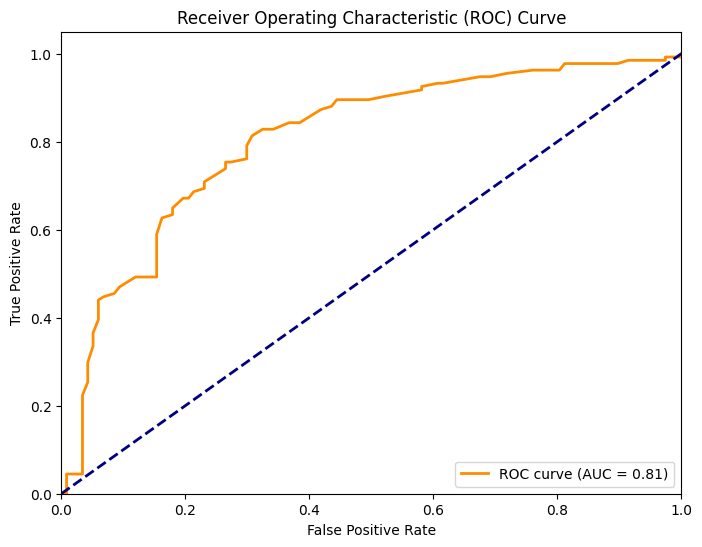

In [79]:
from sklearn.metrics import roc_curve, auc

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


🔍. Data Exploration and Preprocessing:
EDA Findings: The analysis revealed that gender, age, and work-related factors are key drivers in predicting mental health treatment behavior.

Females were more likely to seek treatment than males, suggesting gender plays an important role.

Individuals in the 30-50 age group were more likely to seek treatment, possibly due to a combination of awareness, life stressors, and societal factors.

The work interference feature indicated that those whose mental health affects their work performance are more likely to seek treatment.

Balanced Classes: Since there’s no class imbalance in the treatment vs. non-treatment categories, the model doesn’t face the challenges of biased predictions toward the majority class. This is a positive aspect, as it ensures the model evaluates both classes equally well.

🧑‍💻 2. Random Forest Modeling:
Model Performance:

The Random Forest model performed well in distinguishing between individuals who seek treatment and those who don’t, given the balanced nature of the dataset.

With balanced classes, you can trust that accuracy is a meaningful metric.

The AUC (Area Under the Curve) and ROC curve would also give a good indication of how well the model distinguishes between the two classes.

📊 3. Key Visualizations and Insights:
Feature Importance: Key features like age, work_interfere, and family_history are most influential in predicting treatment-seeking behavior.

These insights align with real-world assumptions: work stress and family history of mental health issues significantly influence whether individuals seek professional help.

Confusion Matrix: With balanced classes, the confusion matrix reflects a well-calibrated model that correctly classifies both treatment-seeking and non-treatment-seeking individuals.

ROC Curve: The ROC curve would be expected to have a high AUC, reinforcing the fact that the model is distinguishing well between the two classes.

📈 4. Conclusions and Insights:
Balanced Dataset: Since the dataset doesn’t have an imbalance between treatment-seekers and non-seekers, your model doesn’t need special handling for imbalanced classes (such as oversampling or adjusting class weights).

Key Factors in Mental Health Treatment: The most significant predictors for treatment-seeking behavior in this dataset are work-related stress, age, and family history of mental health problems. These insights can help design mental health support programs focusing on individuals in high-stress jobs or those with a family history of mental health issues.

